# สมาชิกกลุ่ม

1.   6509520083 ณัฐวุฒิ คำดี
2.   6509611973 มีณฑิศิญากร ศุภประภากร
3.   6509681083 กฤชประพัตธ์ เลิศประเสริฐภากร


# 1.Problem Framing

เพื่อที่จะวิเคราะห์ว่า Lifestyle Factors (พฤติกรรมการใช้ชีวิต) เช่น physical activity levels, stress levels, and BMI categories มีผลต่อกันกับ สุขภาพการนอนหลับ หรือ Cardiovascular Health หรือไม่ อย่างไร

# 2. Data Acquisition

download ข้อมูลจาก Kaggle ชื่อ "Sleep Health and Lifestyle Dataset" -> https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset

เป็นข้อมูล Lifestyle Factors และ Sleep Health

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/TU/66/1-66/CS245/Sleep_health_and_lifestyle_dataset.csv')

In [39]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


#3. Data Preparation

1. Handling Duplicate Data

In [40]:
df.isnull().values.any()

False

In [41]:
# dropping NaN
#df = df.dropna()

# dropping ALL duplicate values
df.drop_duplicates(subset=['Gender', 'Age' , 'Occupation', 'Occupation'
                            , 'Quality of Sleep', 'Physical Activity Level'
                            , 'Stress Level', 'BMI Category' , 'Blood Pressure'
                            , 'Heart Rate' , 'Daily Steps', 'Sleep Disorder']
                    ,keep='first', inplace=False)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,344,Female,57,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,None
344,345,Female,57,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
352,353,Female,58,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
358,359,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,None


2. Boxplot

<Axes: >

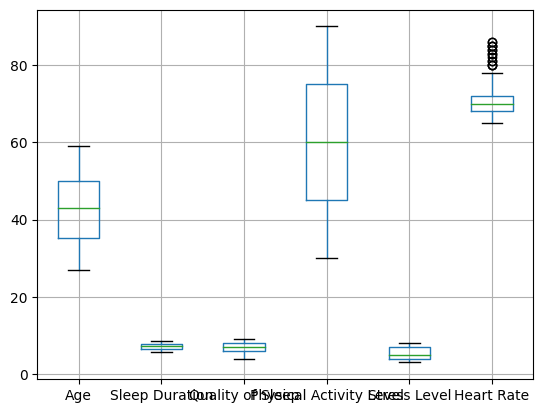

In [42]:
df.boxplot(column=['Age', 'Sleep Duration',  'Quality of Sleep','Physical Activity Level', 'Stress Level' ,'Heart Rate'])

In [43]:
#Calculate quartile 1 and 3 to calculate IQR.
q1 = df['Heart Rate'].quantile(0.25)
q3 = df['Heart Rate'].quantile(0.75)
iqr = q3 - q1
#if that vaulue is more than or less than the line of box it was definded as outlier.
outliers = df.loc[(df['Heart Rate'] < q1 - 1.5*iqr) | (df['Heart Rate'] > q3 + 1.5*iqr)]

In [44]:
#get rid of outlier form dataframe.
df = df.drop(outliers.index)

<Axes: >

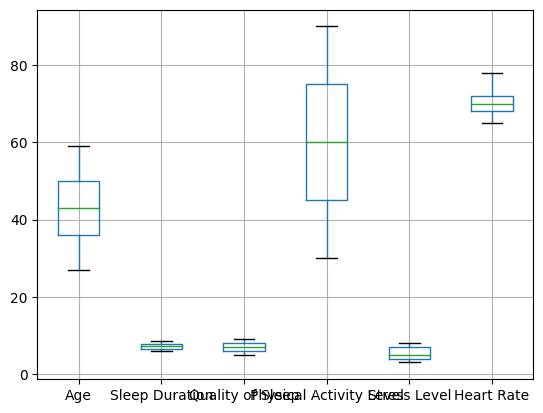

In [45]:
#display dataframe in boxplot.
df.boxplot(column=['Age', 'Sleep Duration',  'Quality of Sleep','Physical Activity Level', 'Stress Level' ,'Heart Rate'])

3. Correlation (corr)

In [46]:
df.corr()

<ipython-input-46-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990037,0.263134,0.390001,0.109790,-0.366938,-0.191564,-0.013341
Age,0.990037,1.000000,0.315749,0.439260,0.142077,-0.397676,-0.193177,0.003712
Sleep Duration,0.263134,0.315749,1.000000,0.889815,0.174076,-0.801368,-0.612842,-0.086963
Quality of Sleep,0.390001,0.439260,0.889815,1.000000,0.127943,-0.908132,-0.721403,-0.093540
Physical Activity Level,0.109790,0.142077,0.174076,0.127943,1.000000,0.012020,0.256545,0.820730
Stress Level,-0.366938,-0.397676,-0.801368,-0.908132,0.012020,1.000000,0.823647,0.249656
Heart Rate,-0.191564,-0.193177,-0.612842,-0.721403,0.256545,0.823647,1.000000,0.318414
Daily Steps,-0.013341,0.003712,-0.086963,-0.093540,0.820730,0.249656,0.318414,1.000000


Relationship between 'Stress Level' and 'Quality of Sleep'


> จะสังเกตได้ว่าค่า Correlation คือ -0.811023 ซึ่งสามารถแปลได้ว่าเป็น High Negative Correlation หรือก็คือ ยิ่ง Stress Level ยิ่งมาก Quality of Sleep ก็จะยิ่งน้อย ในรูปแบบข้อมูลที่ค่อนข้างเกาะกลุ่มกันไปเป็นเส้นตรง



# 4. Data Visualization + 5. Exploratory Data Analysis (EDA)

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
grouped_data = df.groupby(['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']).size().reset_index(name='PopulationOfSameAge')

# Displaying the grouped data
grouped_data

,Age,Sleep Duration,Quality of Sleep,Stress Level,PopulationOfSameAge
0,27,6.1,6,6,1
1,28,6.2,6,8,2
2,29,6.0,6,8,4
3,29,6.1,6,8,2
4,29,7.8,7,6,4
...,...,...,...,...,...
91,57,8.2,9,3,5
92,58,8.0,9,3,6
93,59,8.0,9,3,5
94,59,8.1,9,3,7


In [49]:
data = {
    'Variable': ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level'],
    'Min': [
        grouped_data['Age'].min(),
        grouped_data['Sleep Duration'].min(),
        grouped_data['Quality of Sleep'].min(),
        grouped_data['Stress Level'].min()
    ],
    'Max': [
        grouped_data['Age'].max(),
        grouped_data['Sleep Duration'].max(),
        grouped_data['Quality of Sleep'].max(),
        grouped_data['Stress Level'].max()
    ],
    'Mode': [
        grouped_data['Age'].mode().iloc[0] if not grouped_data['Age'].mode().empty else None,
        grouped_data['Sleep Duration'].mode().iloc[0] if not grouped_data['Sleep Duration'].mode().empty else None,
        grouped_data['Quality of Sleep'].mode().iloc[0] if not grouped_data['Quality of Sleep'].mode().empty else None,
        grouped_data['Stress Level'].mode().iloc[0] if not grouped_data['Stress Level'].mode().empty else None
    ]
}

# Create a DataFrame
result_df = pd.DataFrame(data)

# Print the DataFrame
result_df

,Variable,Min,Max,Mode
0,Age,27.0,59.0,43.0
1,Sleep Duration,5.9,8.5,6.1
2,Quality of Sleep,5.0,9.0,6.0
3,Stress Level,3.0,8.0,6.0


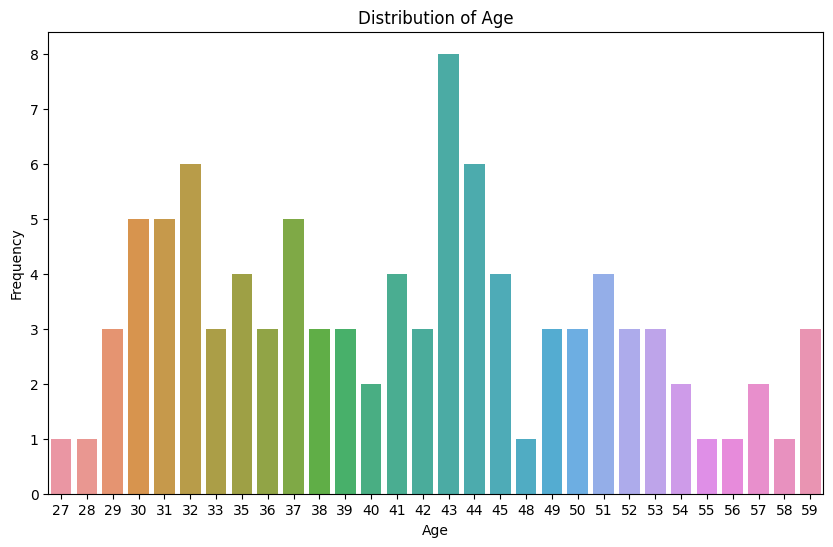

In [70]:
# Visualize the distribution of Age
plt.figure(figsize=(10, 6)) # set canvas width = 10 inches, height = 6 inches
sns.countplot(x='Age', data=grouped_data)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

ได้ Insight ของข้อมูลว่า ส่วนใหญ่คนจะมี age อยู่ที่ 43

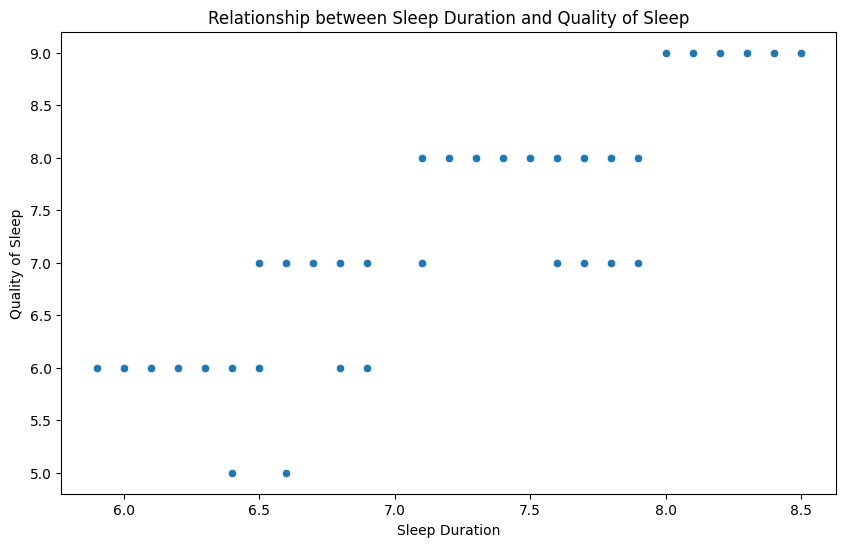

In [51]:
# Visualize the relationship between Sleep Duration and Quality of Sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=grouped_data)
plt.title('Relationship between Sleep Duration and Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

ได้ Insight ของข้อมูลว่า Sleep Duration ที่ดีที่สุดคือ 8.0-8.5 ซึ่งจะได้ Quality of Sleep สูงสุดคือ 9

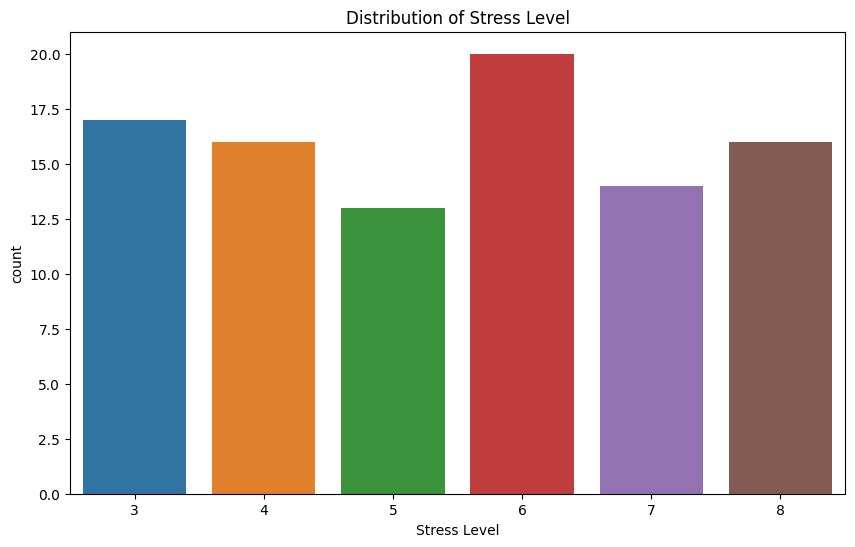

In [55]:
# Visualize the distribution of Stress Level
plt.figure(figsize=(10, 6))
sns.countplot(x='Stress Level', data=grouped_data)
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()

ได้ Insight ของข้อมูลว่า ส่วนใหญ่คนจะมี Stress Level อยู่ที่ 6

# 6. Regression

In [53]:
#'Age', 'Sleep Duration',  'Quality of Sleep','Physical Activity Level', 'Stress Level' ,'Heart Rate'

In [54]:
# Import necessary libraries
from sklearn.model_selection import train_test_split  # Import the function for splitting data
from sklearn.tree import DecisionTreeRegressor  # Import the decision tree regressor
from sklearn.preprocessing import LabelEncoder  # Import label encoder for encoding categorical variables

# Select relevant features and target variable
features = ['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']
X = df[features]  # Create a DataFrame 'X' containing selected features
y = df['Quality of Sleep']  # Define the target variable 'y'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree regression model
model = DecisionTreeRegressor(random_state=42)

# Train the decision tree model using the training data
model.fit(X_train, y_train)

# Retrieve feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)


                   Feature  Importance
1           Sleep Duration    0.878441
3             Stress Level    0.101017
0                      Age    0.017753
4               Heart Rate    0.002789
2  Physical Activity Level    0.000000


สรุปได้ว่า Sleep Duration มีผลต่อ Quality of Sleep มากที่สุด

# 7. Data Interpretation


จากการทำ Correlation และ EDA เราพบว่า
1.   ยิ่ง Stress Level ยิ่งมาก Quality of Sleep ก็จะยิ่งน้อย
2.   Sleep Duration ที่ดีที่สุดคือ 8.0-8.5 ซึ่งจะได้ Quality of Sleep สูงสุดคือ 9
3.   ได้ Insight ของข้อมูลว่า ส่วนใหญ่คนจะมี age อยู่ที่ 43
4.   ส่วนใหญ่คนจะมี Stress Level อยู่ที่ 6
5.   สรุปได้ว่า Sleep Duration มีผลต่อ Quality of Sleep มากที่สุด

ดังนั้นจึงวิเคราะห์ insight จากข้อมูลได้ว่า Lifestyle Factors (พฤติกรรมการใช้ชีวิต) เช่น physical activity levels, stress levels, and BMI categories มีผลต่อกันกับ สุขภาพการนอนหลับ หรือ Cardiovascular Health



